In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [2]:
realtor = pd.read_csv("../data/RDC_Inventory_Core_Metrics_Country_History.csv", low_memory = True)

In [3]:
realtor

,month_date_yyyymm,country,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202404,United States,429950.0,0.0119,-0.0001,734318.0,0.0568,0.3044,47.0,-0.0700,...,769863.0,0.0073,-0.0096,1187383.0,0.0672,0.2001,0.6228,0.0169,-0.1412,0.0
1,202403,United States,424900.0,0.0226,0.0021,694820.0,0.0453,0.2354,50.0,-0.1803,...,764301.0,0.0146,0.0056,1112582.0,0.0812,0.1651,0.6059,0.0536,-0.0988,0.0
2,202402,United States,415500.0,0.0147,0.0027,664716.0,-0.0013,0.1475,61.0,-0.1095,...,753320.0,0.0147,0.0217,1029056.0,0.0561,0.0884,0.5524,0.0879,-0.0863,0.0
3,202401,United States,409500.0,-0.0012,0.0144,665569.0,-0.0681,0.0790,69.0,0.1230,...,742439.0,0.0082,0.0468,974378.0,-0.0572,0.0647,0.4644,0.0133,-0.0242,0.0
4,202312,United States,410000.0,-0.0238,0.0123,714176.0,-0.0547,0.0488,61.0,0.1845,...,736388.0,-0.0088,0.0562,1033505.0,-0.0665,0.0359,0.4511,-0.0187,-0.0189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,201610,United States,255000.0,NaN,NaN,1407698.0,NaN,NaN,72.0,NaN,...,443573.0,NaN,NaN,1757600.0,NaN,NaN,0.2509,NaN,NaN,NaN
91,201609,United States,255000.0,NaN,NaN,1443081.0,NaN,NaN,71.0,NaN,...,439192.0,NaN,NaN,1807800.0,NaN,NaN,0.2561,NaN,NaN,NaN
92,201608,United States,255271.0,NaN,NaN,1460048.0,NaN,NaN,67.0,NaN,...,439230.0,NaN,NaN,1848445.0,NaN,NaN,0.2690,NaN,NaN,NaN
93,201607,United States,259000.0,NaN,NaN,1463007.0,NaN,NaN,64.0,NaN,...,442832.0,NaN,NaN,1873189.0,NaN,NaN,0.2839,NaN,NaN,NaN


In [4]:
realtor.columns

Index(['month_date_yyyymm', 'country', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
       'tot

In [5]:
# Check missing values for each column
realtor.isna().mean()

month_date_yyyymm                          0.000000
country                                    0.000000
median_listing_price                       0.010526
median_listing_price_mm                    0.136842
median_listing_price_yy                    0.136842
active_listing_count                       0.010526
active_listing_count_mm                    0.136842
active_listing_count_yy                    0.136842
median_days_on_market                      0.010526
median_days_on_market_mm                   0.136842
median_days_on_market_yy                   0.136842
new_listing_count                          0.010526
new_listing_count_mm                       0.136842
new_listing_count_yy                       0.136842
price_increased_count                      0.010526
price_increased_count_mm                   0.136842
price_increased_count_yy                   0.136842
price_reduced_count                        0.010526
price_reduced_count_mm                     0.136842
price_reduce

Remove the "_mm" & "_yy" columns

In [6]:
realtor = realtor[['month_date_yyyymm','country',# 'state', 'state_id', 
                   #'postal_code', 'zip_name',
                   'median_listing_price',
       #'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count',
        #'active_listing_count_mm',
       #'active_listing_count_yy',
        'median_days_on_market',
       #'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count',
        #'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count',
        #'price_increased_count_mm',
       #'price_increased_count_yy',
        'price_reduced_count',
       #'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count',
        #'pending_listing_count_mm',
       #'pending_listing_count_yy',
        'median_listing_price_per_square_foot',
       #'median_listing_price_per_square_foot_mm',
       #'median_listing_price_per_square_foot_yy',
        'median_square_feet',
       #'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price',
        #'average_listing_price_mm',
       #'average_listing_price_yy',
        'total_listing_count',
       #'total_listing_count_mm', 'total_listing_count_yy',
        'pending_ratio',
       #'pending_ratio_mm', 'pending_ratio_yy',
        'quality_flag']]

Last row includes some metadata that needs to be removed

In [7]:
realtor = realtor[:-1]

In [8]:
realtor

,month_date_yyyymm,country,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
0,202404,United States,429950.0,734318.0,47.0,432028.0,23232.0,250924.0,457359.0,230.0,1840.0,769863.0,1187383.0,0.6228,0.0
1,202403,United States,424900.0,694820.0,50.0,395536.0,21144.0,220240.0,421007.0,228.0,1825.0,764301.0,1112582.0,0.6059,0.0
2,202402,United States,415500.0,664716.0,61.0,339370.0,20800.0,201428.0,367162.0,224.0,1818.0,753320.0,1029056.0,0.5524,0.0
3,202401,United States,409500.0,665569.0,69.0,295178.0,18026.0,182930.0,309115.0,221.0,1823.0,742439.0,974378.0,0.4644,0.0
4,202312,United States,410000.0,714176.0,61.0,235584.0,14280.0,160548.0,322167.0,220.0,1838.0,736388.0,1033505.0,0.4511,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,201611,United States,252995.0,1339703.0,74.0,376704.0,33728.0,319372.0,331791.0,126.0,1903.0,444847.0,1667766.0,0.2477,NaN
90,201610,United States,255000.0,1407698.0,72.0,413376.0,36128.0,365872.0,353149.0,127.0,1913.0,443573.0,1757600.0,0.2509,NaN
91,201609,United States,255000.0,1443081.0,71.0,452994.0,37224.0,406610.0,369527.0,127.0,1920.0,439192.0,1807800.0,0.2561,NaN
92,201608,United States,255271.0,1460048.0,67.0,470780.0,40484.0,408718.0,392800.0,126.0,1921.0,439230.0,1848445.0,0.2690,NaN


In [9]:
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'], format = '%Y%m')

In [10]:
realtor['month_date_yyyymm']

0    2024-04-01
1    2024-03-01
2    2024-02-01
3    2024-01-01
4    2023-12-01
        ...    
89   2016-11-01
90   2016-10-01
91   2016-09-01
92   2016-08-01
93   2016-07-01
Name: month_date_yyyymm, Length: 94, dtype: datetime64[ns]

In [11]:
us_median_listing = realtor.groupby('month_date_yyyymm')['median_listing_price'].mean().reset_index()

<Axes: xlabel='month_date_yyyymm', ylabel='median_listing_price'>

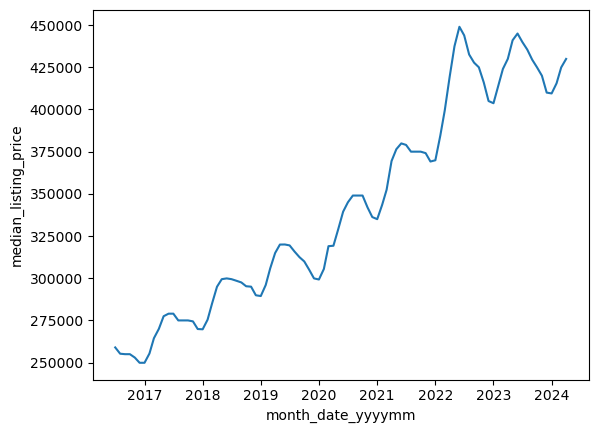

In [12]:
sns.lineplot(data = us_median_listing, x = 'month_date_yyyymm', y = 'median_listing_price')

In [13]:
realtor.to_csv('../data/realtor_housing_metrics_country.csv', index = False)